# Jax

In [57]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"

## Jax is autograd and XLA

In [58]:
import jax

Gradients and vectorisation operations are ubiquitous in machine learning

# Why jax?
* Jax is numpy for machine learning
* Jax is numpy +
1. Gradients
2. non-trivial vectorisations
3. parallelisation

In [272]:
def f(x):
    return jnp.sin(x)

df = jax.grad(f)

In [277]:
f(0.0) # sin(0) = 0

Array(0., dtype=float32, weak_type=True)

In [278]:
df(0.0) # cos(0) = 1

Array(1., dtype=float32, weak_type=True)

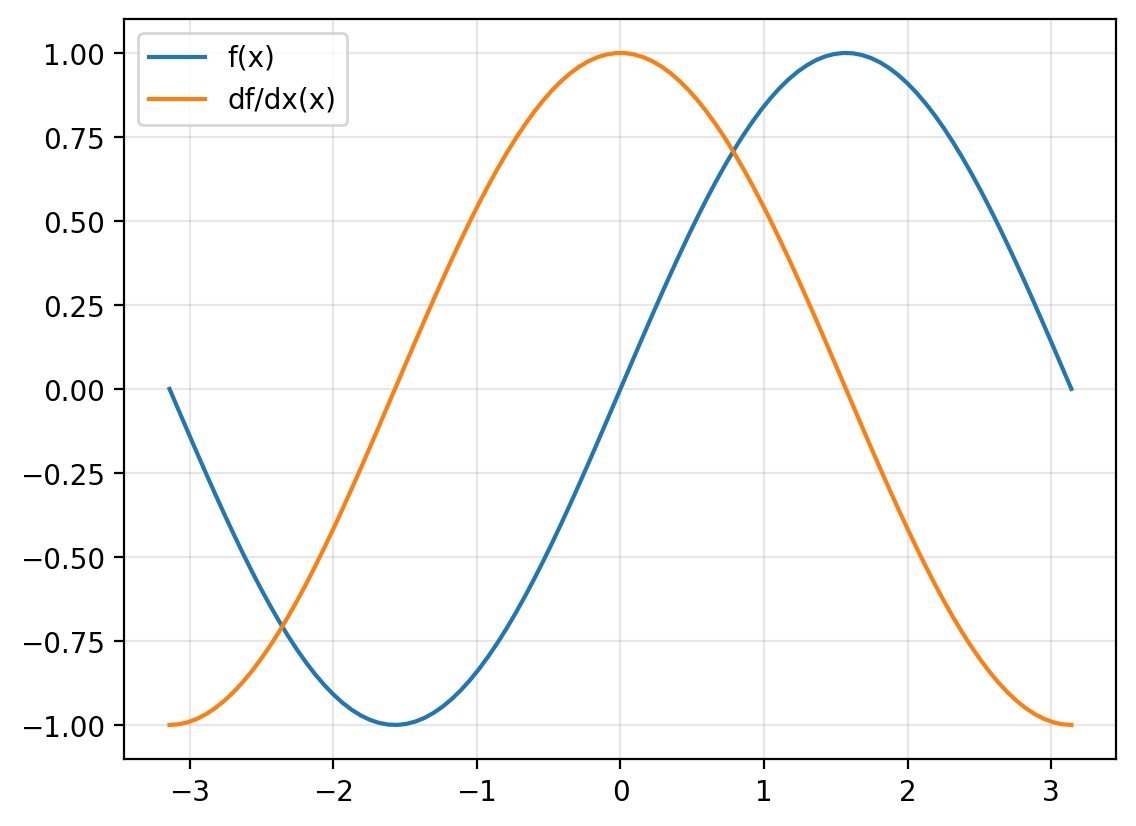

In [280]:
x = jnp.linspace(-jnp.pi, jnp.pi, 100)
plt.plot(x, f(x), label="f(x)")
plt.plot(x, jax.vmap(df)(x), label="df/dx(x)")
plt.legend()
plt.grid(alpha=0.3)

In [233]:
def f(x, y):
    return (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2

X = np.mgrid[-4:4:0.01, -4:4:0.01]

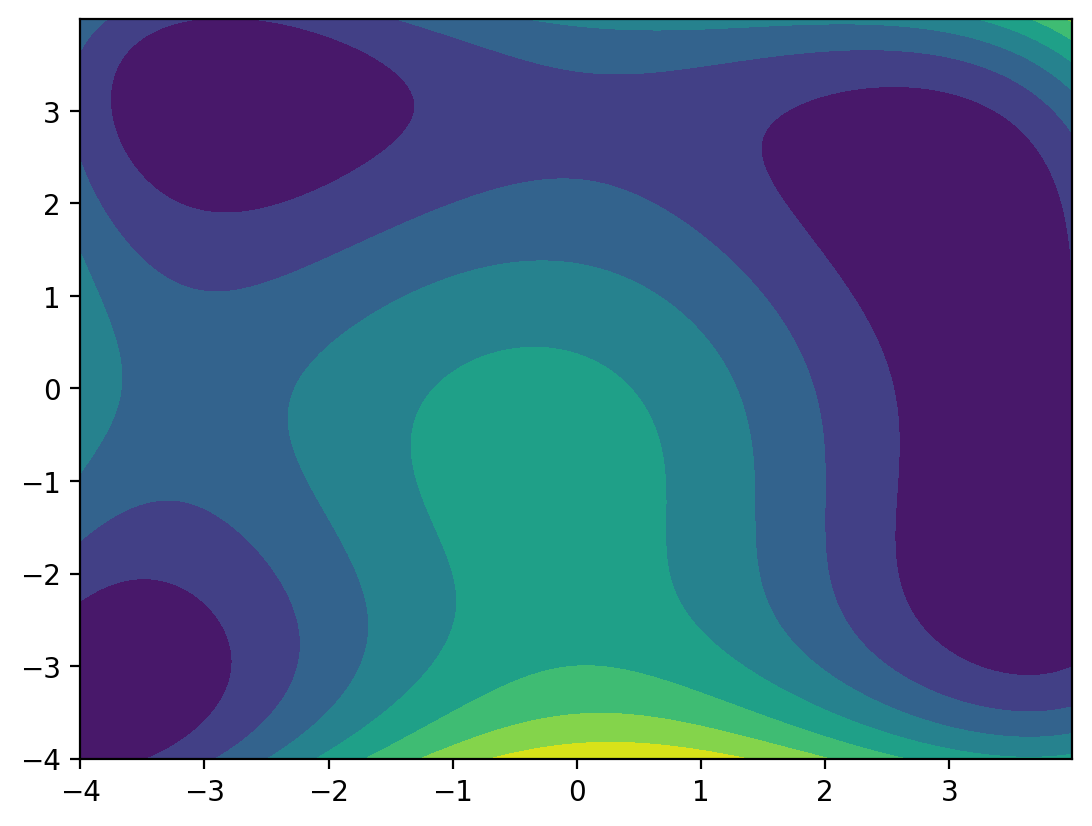

In [234]:
plt.contourf(*X, f(*X))

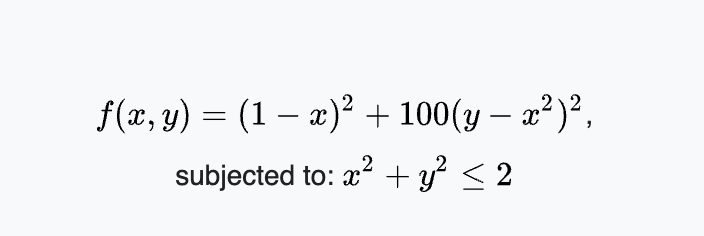

In [264]:
def f(x, y):
    val = (1 - x) ** 2 + 100 * (y - x ** 2) ** 2
    const = (x ** 2 + y ** 2) <= 2
    return val * const

(-1.5, 1.4900000000000002, -1.5, 1.4900000000000002)

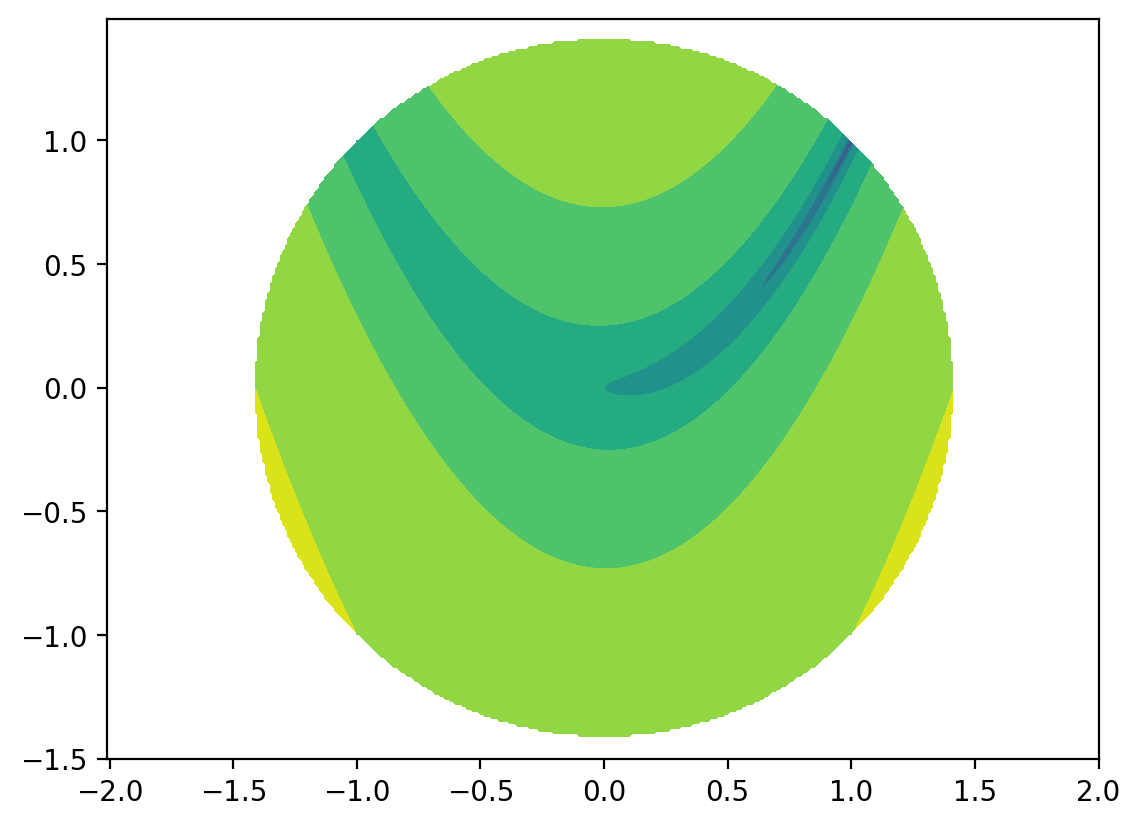

In [265]:
X = np.mgrid[-1.5:1.5:0.01, -1.5:1.5:0.01]
plt.contourf(*X, jnp.log(f(*X)))
plt.axis("equal")

## `jax.vmap`: vectorisation

In [382]:
def f(x, mu, sigma2):
    return 1 / jnp.sqrt(jnp.pi * sigma2) * jnp.exp(-(x - mu) ** 2 / (2 * sigma2))

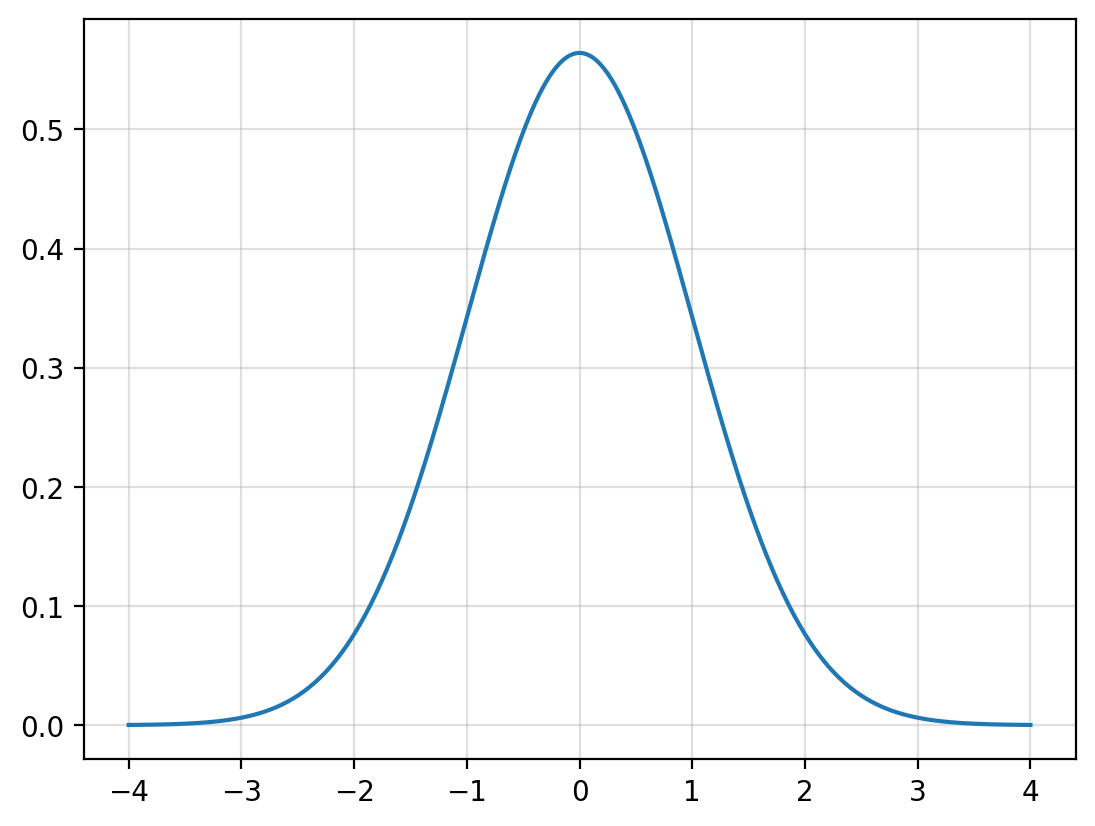

In [439]:
xrange = jnp.linspace(-4, 4, 500)
mu = 0.0
sigma2 = 1.0

plt.plot(xrange, f(xrange, mu, sigma2))
plt.grid(alpha=0.4)

Y tho?

## What about grad?

In [440]:
# Error: output should be a scalar
df = jax.grad(f)
df(xrange, mu, sigma2)

TypeError: Gradient only defined for scalar-output functions. Output had shape: (500,).

In [443]:
df(1.0, mu, sigma2)

Array(-0.34219888, dtype=float32, weak_type=True)

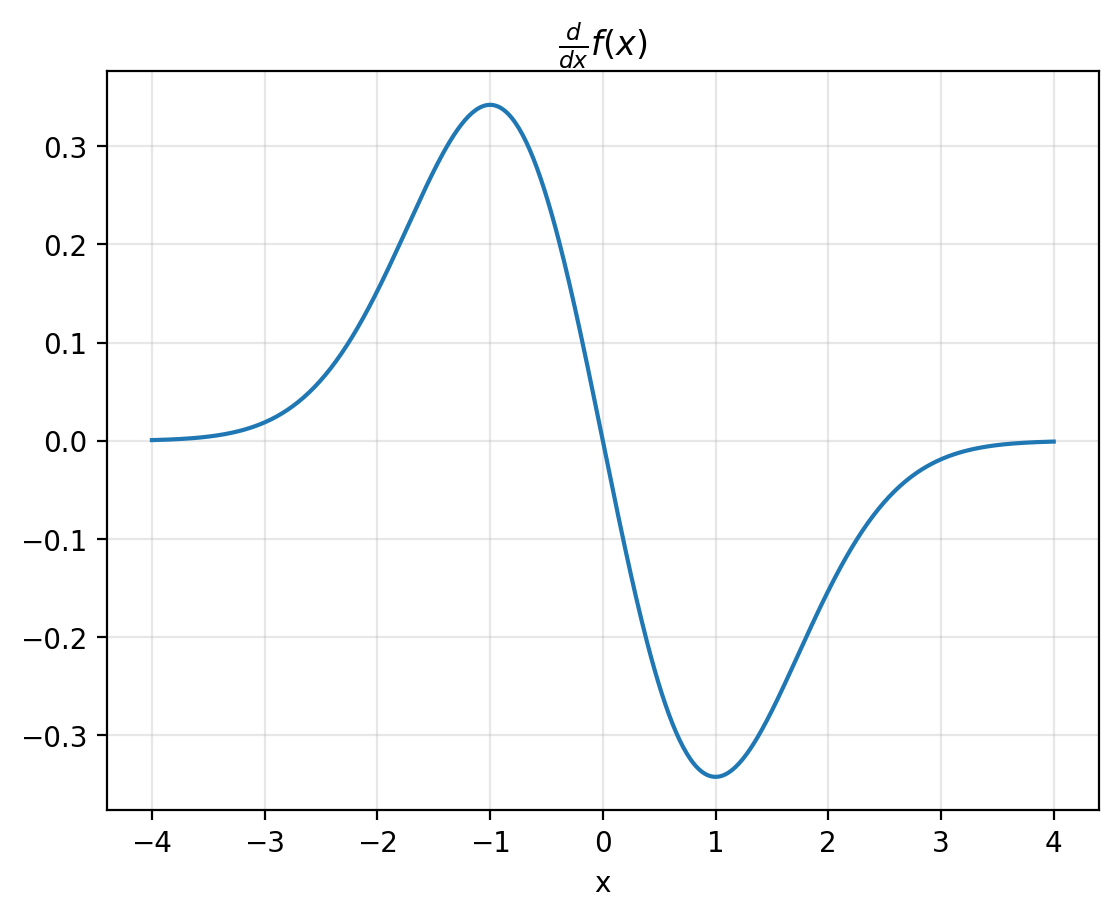

In [445]:
dfv = jax.vmap(df, in_axes=(0, None, None))
plt.plot(xrange, dfv(xrange, mu, sigma2))
plt.title(r"$\frac{d}{dx}f(x)$")
plt.xlabel("x")
plt.grid(alpha=0.3)

## Evaluate `f` over multiple values of `sigma`

In [446]:
sigma_values = jnp.array([0.1, 0.5, 1.0, 5.0])

In [447]:
fv = jax.vmap(f, in_axes=(0, None, None)) # optional
fv = jax.vmap(fv, in_axes=(None, None, 0)) # Keep first and second parameter fixed, evaluate over third
sigma_values = jnp.array([0.1, 0.5, 1.0, 5.0])

fv(xrange, mu, sigma_values).shape

(4, 500)

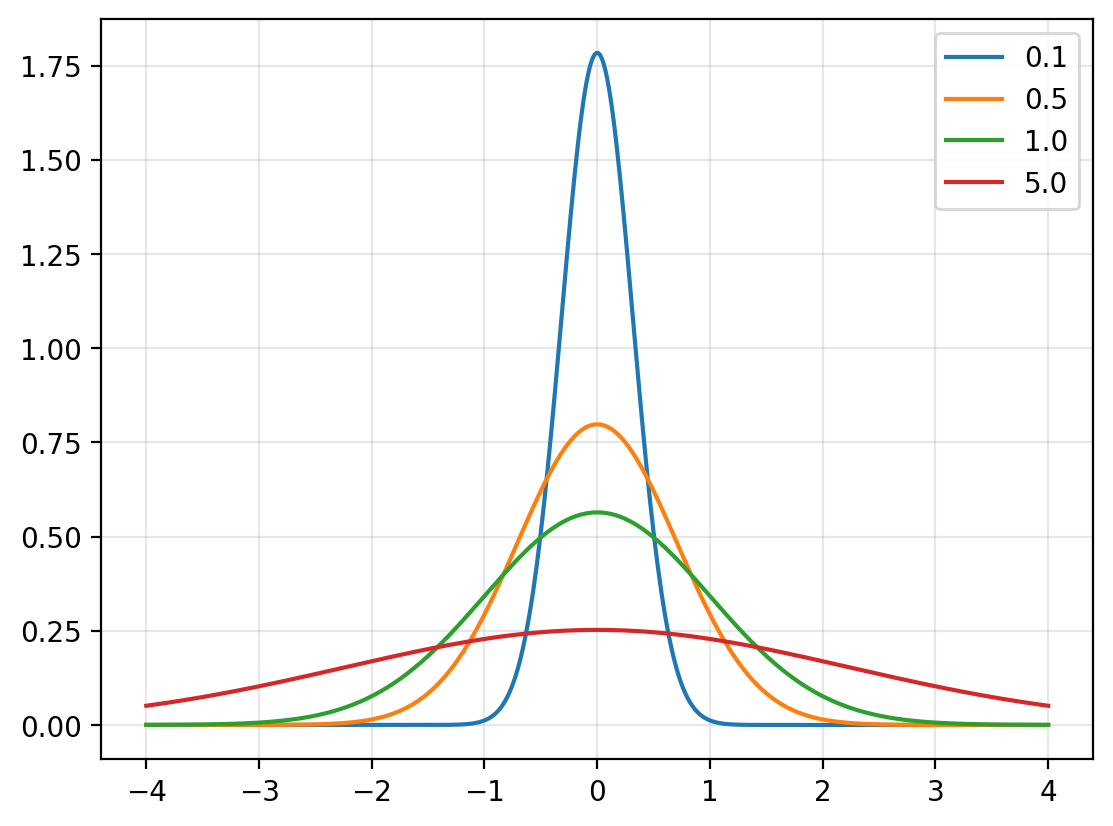

In [448]:
plt.plot(xrange, fv(xrange, mu, sigma_values).T, label=sigma_values)
plt.legend()
plt.grid(alpha=0.3)

## Evaluate `df/dx` over multiple values of `sigma`

In [452]:
sigma_values = jnp.array([0.3, 0.5, 1.0, 3.0])

In [453]:
dfv = jax.vmap(jax.grad(f), in_axes=(0, None, None))
dfv = jax.vmap(dfv, in_axes=(None, None, 0))

dfv(xrange, mu, sigma_values).shape

(4, 500)

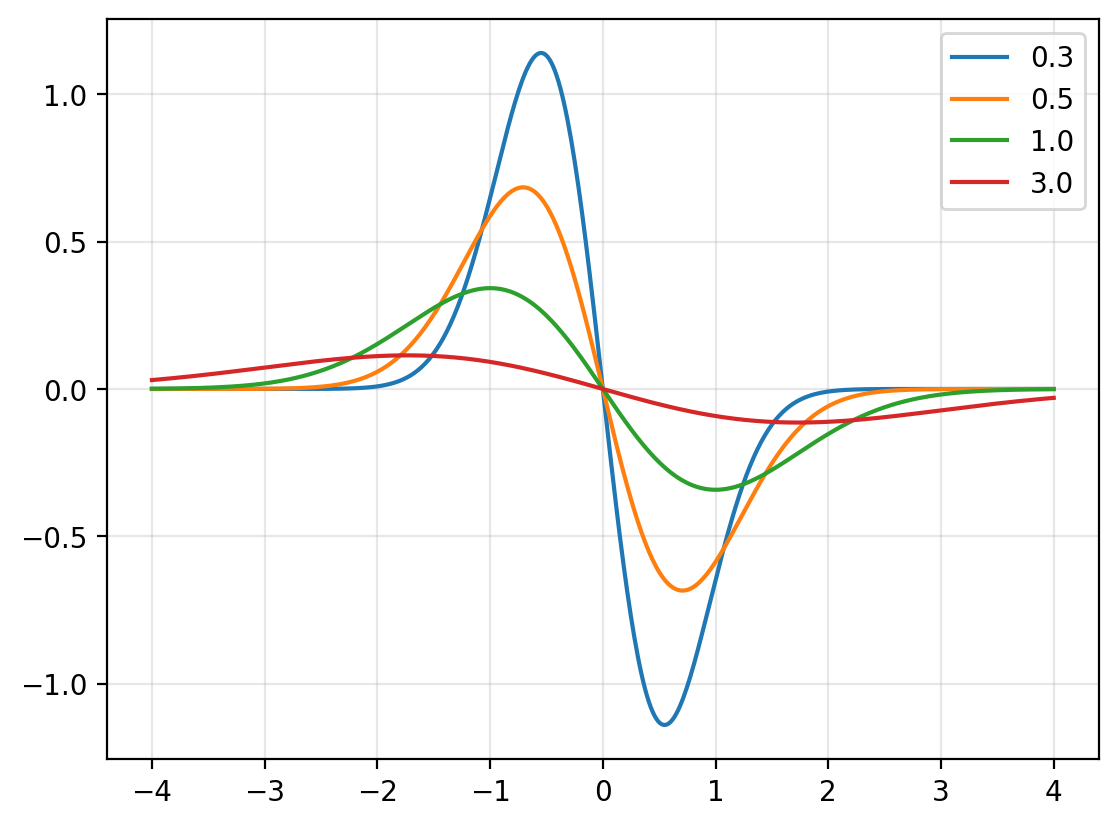

In [454]:
plt.plot(xrange, dfv(xrange, mu, sigma_values).T, label=sigma_values)
plt.legend()
plt.grid(alpha=0.3)